<a href="https://colab.research.google.com/github/MariamZayed/Computer_Vision_labs/blob/main/Lab7_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In the previous section we took Fast and SIFT feature detection
<p> in this section we're going to implement description detection algorithms  SURF, BRIEF, ORB

Anyway, SIFT_create() and xfeatures2d_create() are not not working with this cuurent python and open cv versions. After searching, it might work woth pycharm but not with google colab
- so SIFT and BREIF are not working with me

##Importing Section

In [2]:
from google.colab.patches import cv2_imshow as cv_imshow

In [3]:
import numpy as np
import cv2 as cv

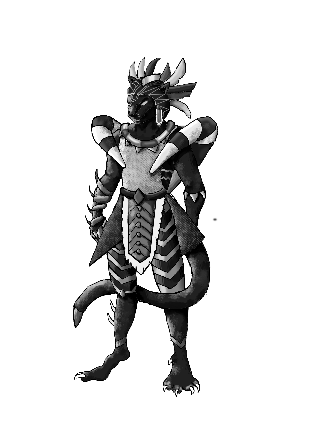

In [6]:
img = cv.imread('panther.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.resize(gray,(0,0),fx=0.125, fy=0.125)
img = cv.resize(img,(0,0),fx=0.125, fy=0.125)

cv_imshow(gray)

## SURF
- It is faster than SIFT
- cause it works with Box Filter, (SURF works with LOG)
- bix filter is easily convolouted
---
- SIFT is invarient to scale and rotation, illumination, noise and so on.

In [ ]:
#create an object from surf and maximum number of featurs to extract 
surf = xfeatures2d.SURF_create(400)
#detect the keypoint
surf_kp = surf.detect(img, None)
#now lets compute descriptors with also surf
descriptors = surf.compute(img, surf_kp)
#draw the kp
img2 =  surf.drawKepoints(img, surf_kp, None, (255,0,0))
#out of curious, let's print the numbers the kp in this image
print(len(surf_kp))
# for descriptors, we  can know the size of the descriptor
print(surf.descriptorsSize())

cv_show(img2)


<p> 1- SURF_create(Max_num_feature): 

*   it's usually between 300 form 500 
*   Max_num_feature paramter is the limit to extracted keypoints/features from the image
*   so 400 means extracte only 400 keypoints/features, if found less then bring them all. If there is than more, then only bring the 400.


<p>2- descriptorsSize() is function is used to compute any descriptors size, either to SIFT or BRIEF algoritms. </p>

## ORB (Oriented FAST and Rotated BRIEF)
- It's an enhanced alternative to Fast and BRIEF
- So it feature and descriptor algoritm

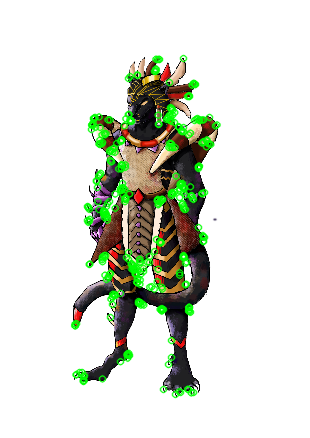

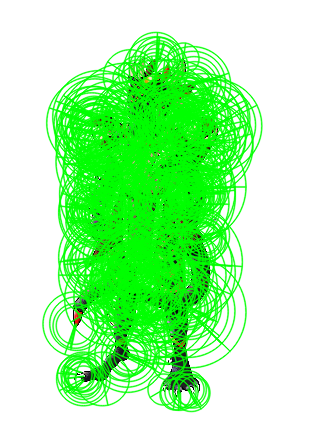

400
32


In [24]:
#Detect features first by ORB and maximum number of featurs to extract 
#create orb object and set threshold value 
orb = cv.ORB_create(400)
#detect keypoints/features
orb_kp = orb.detect(img,None)

#draw the kp in the orginal image
orb_img = cv.drawKeypoints(img,orb_kp, None, (0,255,0))
#this is to draw wider circles around each feature and to make it more thiker with the flag paramter
thick_orb_img = cv.drawKeypoints(img,orb_kp, None, (0,255,0), flags =cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
cv_imshow(orb_img)
cv_imshow(thick_orb_img)

#detect descriptors for keypoints
orb_descriptors = orb.compute(img, orb_kp)
#out of curious, let's print the numbers the kp in this image
print(len(orb_kp))
# for descriptors, we  can know the size of the descriptor
print(orb.descriptorSize())

## BRIEF (Binary Robust Independent Elementary Features)
- One important point is that BRIEF is a feature descriptor only, not feature dedctor.
- if want to extract then use other detection algorithms like Harris, SIFT, SURF
- BRIEF is a faster method feature descriptor calculation and matching. It also provides high recognition
rate unless there is large in plane rotation. 
بيعرف يعمل دسكربشن كويس الا اذا حصل روتيشن كتير لصوره فمش هيعرف يطلع نفس الدسكربشن وهيغلط

we're going to use an detection algoritm to detect keypoints called star, so this is our first step

In [ ]:
#start detecting
#create an object from Star class
star = cv.xfeatures2d.StarDetector_create()
# find the keypoints/features with STAR object
brif_kp = star.detect(gray,None)
#draw keypoints/features in the image and show
breif_img = cv.drawKeypoints(gray, kp, None, (0,0,255))
cv_imshow(breif_img)
##Done detecting

#start computing descrption
#create an object from BRIF class 
brief = cv.xfeature2d.BriefDescriptorExtractor_craete()
#compute descrption
breif_descriptions =brif.compute(gray, kp)

#out of curious, let's print the numbers the kp in this image
print(len(breif_descriptions))
# for descriptors, we  can know the size of the descriptor
print(brief.descriptorSize())
